<a href="https://colab.research.google.com/github/FelipeErmeson/credit-card-fraud-detection/blob/main/Analise_de_Dados_de_Fraude_em_Cartoes_de_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="30%" src="https://raw.githubusercontent.com/FelipeErmeson/Data-Science-Projects/b35dcf53814c50c86f65de7628483151404026a7/logotipo.svg">

*by [Felipe Lima](https://www.linkedin.com/in/felipe-ermeson-b484bb128/)*

---

## **Análise de Dados de Fraudes em Cartões de Crédito**

Os ataques cibernéticos estão cada vez mais sofisticados, e segundo a pesquisa da *PSafe*, o Brasil registra mais de mil tentativas de **fraudes financeiras** digitais por hora.

Uma das principais preocupações dos bancos e *fintechs* é a correta identificação de uma transação fraudulenta ou não fraudulenta. 

A estimativa é que o prejuízo possa chegar a 2.5 Bilhões de reais no final de 2022. Esse número subestimado ou não, é um valor considerável já que é na casa do bilhão.

O problema de fraudes financeiras digitais, principalmente de cartões de crédito possuem **dois fatores importantes a serem considerados**. O primeiro é a não detecção da fraude, o que pode acarretar prejuízos ao banco e ao cliente. O segundo é a acusação de fraude errôneamente, o que pode acarretar *stress* e constrangimento ao cliente.

<p align=center>
<img src="https://images.unsplash.com/photo-1537724326059-2ea20251b9c8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=876&q=80" width="50%"></p>

Neste notebook foi realizada uma análise sobre os dados disponíveis de algumas empresas europeias, em um **período de dois dias**.

A [fonte](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dos dados também nos informa que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA). Onde são realizadas transformações das variáveis originais, reduzindo a dimensão dos dados. Então, a quantidade das variáveis que temos são iguais ou menor do que os dados originais (sem a transformação).

## Obtenção dos Dados

In [1]:
# importar os pacotes necessários
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
# file_path = "dados/creditcard.csv"

df = pd.read_csv(file_path)
df.shape

(284807, 31)

## Análise Exploratória

Nesta análise foi explorado se o dataset possue algum valor faltante, qual seria a variável alvo e se a mesma está balanceada, além de visualizar distribuições de algumas variáveis e suas correlações.

Percebemos ao visualizar as 5 primeiras linhas do DataFrame, que as *features* estão anônimizadas, para preservar os clientes e o próprio banco.

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Visualizando um pouco da análise descritiva, a variável Amount possue um valor mínimo de 0 e um máximo 25691.16.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Verificando se o dataset possue valores nulos.

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
BRANCO = '#FFFFFF'
BRANCO_GELO = '#F7F7F7'
CINZA_ESCURO = '#808080'
CINZA_CLARO = '#A6A6A6'
AZUL = '#4F81BD'
LARANJA = '#ED6D47'

sns.color_palette([BRANCO, BRANCO_GELO, CINZA_CLARO, CINZA_ESCURO, AZUL, LARANJA])

[(1.0, 1.0, 1.0),
 (0.9686274509803922, 0.9686274509803922, 0.9686274509803922),
 (0.6509803921568628, 0.6509803921568628, 0.6509803921568628),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.30980392156862746, 0.5058823529411764, 0.7411764705882353),
 (0.9294117647058824, 0.42745098039215684, 0.2784313725490196)]

In [7]:
def change_width(ax, new_value):
  '''
  Método auxiliar com o objetivo de alterar
  a largura das barras.
  '''
  for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - new_value
    # altera a largura das barras
    patch.set_width(new_value)
    # centraliza o label no eixo x
    patch.set_x(patch.get_x() + diff * .5)

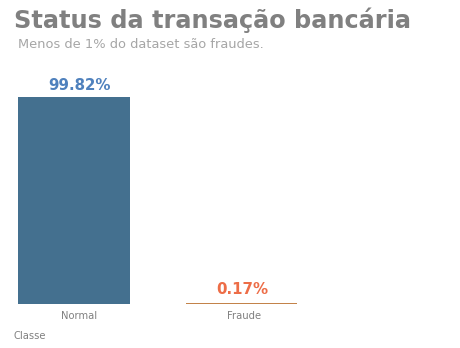

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor(BRANCO)
sns.countplot(x='Class', data=df, saturation=0.5, ax=ax)
ax.text(-0.47, 380000,'Status da transação bancária', fontsize=24, color=CINZA_ESCURO, fontweight='bold')
ax.set_title('Menos de 1% do dataset são fraudes.', color=CINZA_CLARO, x=0.3, y=1.15, size=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(colors=CINZA_ESCURO, labelleft=False, left=False, bottom=False) # removendo label e valores do eixo y e alterando a cor dos labels x

ax.set_xlabel(xlabel='Classe', x=0.05, labelpad=10, color=CINZA_ESCURO)
ax.get_yaxis().set_visible(False) #ylabel='Quantidade', y=0.8, labelpad=10
ax.set_xticklabels(['Normal', 'Fraude'])
change_width(ax, 0.5)
# definindo a coordenada das barras, para reduzir o espaço entre as barras
ax.patches[0].set_x(-0.45)
ax.patches[1].set_x(0.3)
# definindo a coordenada do rótulo das barras
ax.set_xticks([-0.18, 0.56])

# ax.set_facecolor('#F7F7F7') #alterando cor de fundo

ax.annotate(
    str(df.Class.value_counts(normalize=True)[0]*100)[:5]+"%",
    xy=(-0.45, 295000),
    xytext=(30,0),
    textcoords='offset points',
    color=AZUL,
    fontsize=15,
    fontweight='semibold'
            )

ax.annotate(
    str(df.Class.value_counts(normalize=True)[1]*100)[:4]+"%",
    xy=(0.3, 15000),
    xytext=(30,0),
    textcoords='offset points',
    color=LARANJA,
    fontsize=15,
    fontweight='semibold'
            )

plt.show()

In [9]:
# Distribuição da variável alvo em valores absolutos
print(df.Class.value_counts())
# Distribuição da variável alvo em porcentagem
print(df.Class.value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [10]:
df.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

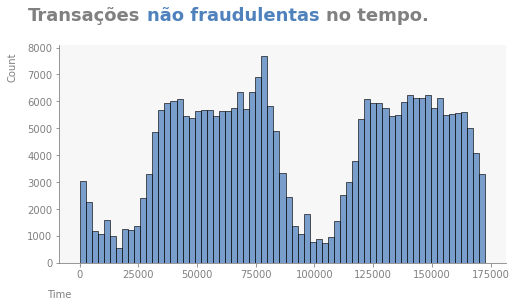

In [11]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor(BRANCO)
sns.histplot(data=df[df['Class']==0], x='Time', color=AZUL, ax=ax)
ax.text(-22000, 9000, 'Transações', color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.text(28500, 9000, 'não fraudulentas', color=AZUL, fontsize=18, fontweight='semibold')
ax.text(105000, 9000, 'no tempo.', color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.spines['left'].set_color(CINZA_ESCURO)
ax.tick_params(colors=CINZA_ESCURO)
ax.set_xlabel(xlabel='Time', x=0.0, labelpad=10, color=CINZA_ESCURO)
ax.set_ylabel(ylabel='Count', y=0.9, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(BRANCO_GELO)
plt.show()

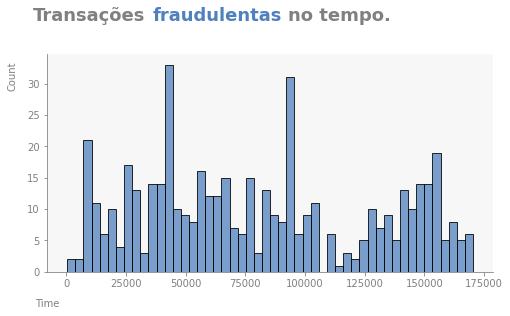

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor(BRANCO)
sns.histplot(data=df[df['Class']==1], x='Time', color=AZUL, ax=ax, bins=50)
ax.text(-14000, 40, "Transações",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.text(36000, 40, "fraudulentas",color=AZUL, fontsize=18, fontweight='semibold')
ax.text(93000, 40, "no tempo.",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.spines['left'].set_color(CINZA_ESCURO)
ax.tick_params(colors=CINZA_ESCURO)
ax.set_xlabel(xlabel='Time', x=0.0, labelpad=10, color=CINZA_ESCURO)
ax.set_ylabel(ylabel='Count', y=0.9, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(BRANCO_GELO)
plt.show()

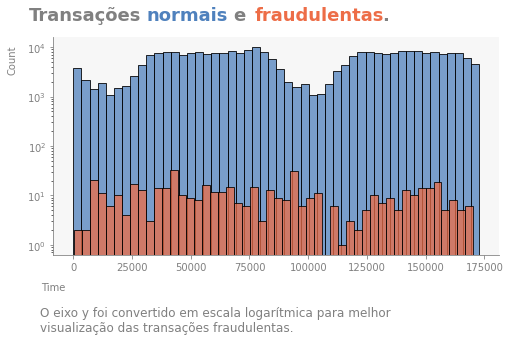

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor(BRANCO)
sns.histplot(data=df[df['Class']==0], x='Time', color=AZUL, bins=50)
sns.histplot(data=df[df['Class']==1], x='Time', color=LARANJA, bins=50)
ax.text(-19000, 35000, "Transações",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.text(31000, 35000, "normais",color=AZUL, fontsize=18, fontweight='semibold')
ax.text(67900, 35000, "e",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.text(77000, 35000, "fraudulentas",color=LARANJA, fontsize=18, fontweight='semibold')
ax.text(131600, 35000, ".",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.text(-0.03, -0.35, "O eixo y foi convertido em escala logarítmica para melhor\nvisualização das transações fraudulentas.", fontsize=12, color=CINZA_ESCURO, transform=ax.transAxes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.spines['left'].set_color(CINZA_ESCURO)
ax.set_xlabel(xlabel='Time', x=0.0, labelpad=10, color=CINZA_ESCURO)
ax.set_ylabel(ylabel='Count', y=0.9, labelpad=10, color=CINZA_ESCURO)
ax.tick_params(colors=CINZA_ESCURO)
ax.set_facecolor(BRANCO_GELO)
ax.set_yscale('log')
plt.show()

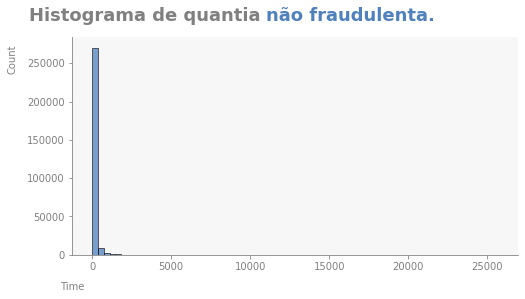

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor(BRANCO)
sns.histplot(data=df[df['Class']==0], x='Amount', color=AZUL, bins=70)
ax.text(-4000, 305000, "Histograma de quantia",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.text(11000, 305000, "não fraudulenta.",color=AZUL, fontsize=18, fontweight='semibold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.spines['left'].set_color(CINZA_ESCURO)
ax.tick_params(colors=CINZA_ESCURO)
ax.set_xlabel(xlabel='Time', x=0.0, labelpad=10, color=CINZA_ESCURO)
ax.set_ylabel(ylabel='Count', y=0.9, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(BRANCO_GELO)
plt.show()

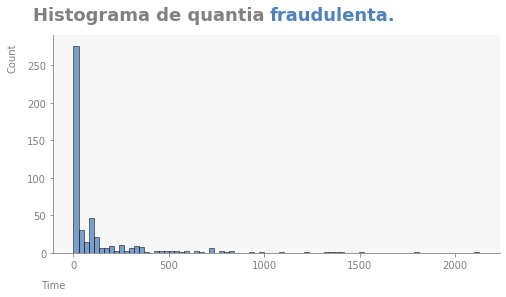

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor(BRANCO)
sns.histplot(data=df[df['Class']==1], x='Amount', color=AZUL, ax=ax)
ax.text(-210, 310, "Histograma de quantia",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.text(1030, 310, "fraudulenta.",color=AZUL, fontsize=18, fontweight='semibold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.spines['left'].set_color(CINZA_ESCURO)
ax.tick_params(colors=CINZA_ESCURO)
ax.set_xlabel(xlabel='Time', x=0.0, labelpad=10, color=CINZA_ESCURO)
ax.set_ylabel(ylabel='Count', y=0.9, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(BRANCO_GELO)
plt.show()

A maior concentração de valores transacionados estão com valores **ZERADOS**. É preciso uma melhor investigação sobre esse fato. Por que pessoas estariam transacionando um valor de ZERO? Ou seria um erro de arredondamento no app, e entre outras possíveis alternativas de resposta.

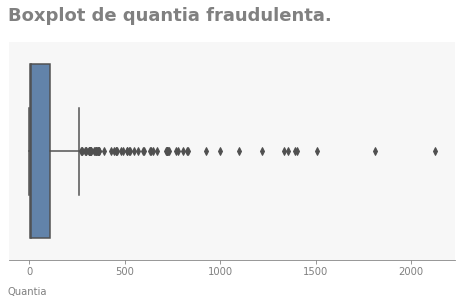

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor(BRANCO)
sns.boxplot(data=df[df['Class']==1], x='Amount', color=AZUL, saturation=0.65)
ax.text(-110, -0.6, "Boxplot de quantia fraudulenta.",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.tick_params(colors=CINZA_ESCURO, left=False)
ax.set_xlabel(xlabel='Quantia', x=0.04, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(BRANCO_GELO)
plt.show()

**Correlação** não necessariamente é uma **relação de causa e efeito**, mas pode nos apresentar bons *insights* para análise e modelagem do problema.

In [17]:
df_corr = df.corr()
df_corr = df_corr.where(np.tril(np.ones(df_corr.shape)).astype(bool))

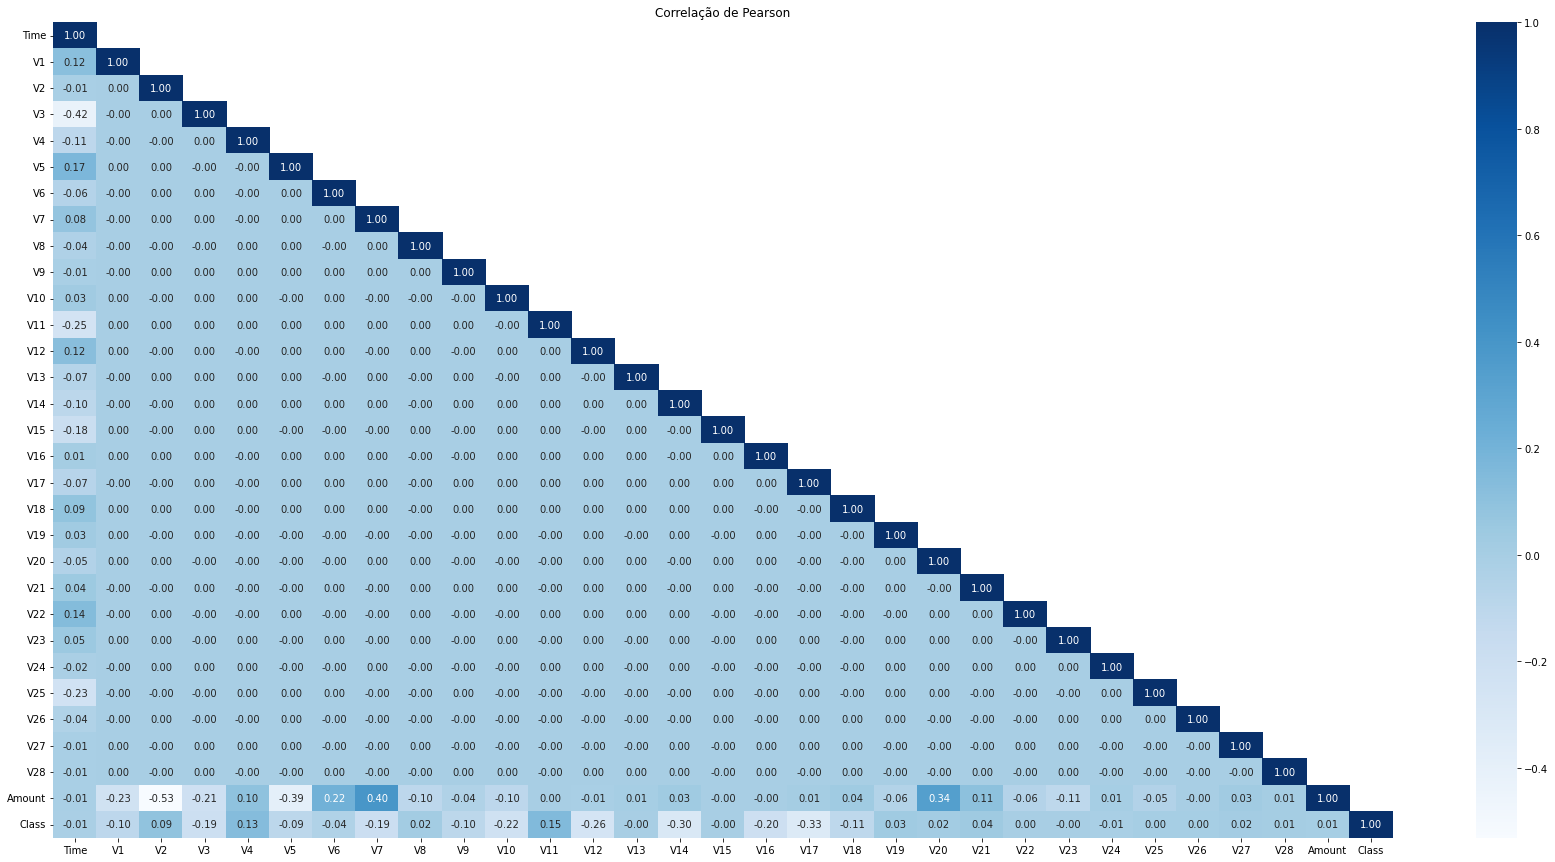

In [18]:
fig, ax = plt.subplots(figsize=(30,15)) 
ax = sns.heatmap(df_corr, annot=True, cmap='Blues', ax=ax, fmt='.2f')
ax.set_xticklabels(df_corr.columns, rotation=0)
ax.set_title('Correlação de Pearson');

A variável Amount e V2 possue uma correlação negativa considerável em relação a outras correlações do dataset. Abaixo temos uma dispersão dessas duas *features*.

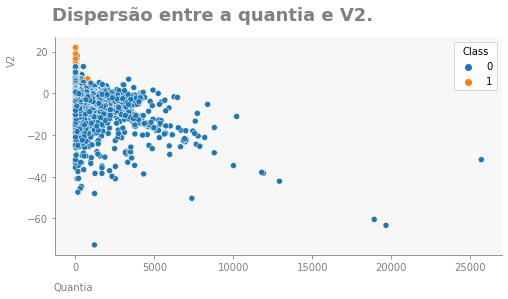

In [19]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor(BRANCO)
sns.scatterplot(data=df, x='Amount', y='V2', hue='Class')
ax.text(-1500, 35, "Dispersão entre a quantia e V2.",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.spines['left'].set_color(CINZA_ESCURO)
ax.tick_params(colors=CINZA_ESCURO)
ax.set_xlabel(xlabel='Quantia', x=0.04, labelpad=10, color=CINZA_ESCURO)
ax.set_ylabel(ylabel='V2', y=0.9, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(BRANCO_GELO)
plt.show()

Percebemos que Amount e V7 possuem uma correlação positiva interessante.

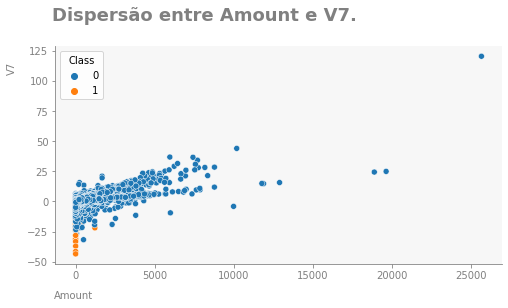

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor(BRANCO)
sns.scatterplot(data=df, x='Amount', y='V7', hue='Class')
ax.text(-1500, 150, "Dispersão entre Amount e V7.",color=CINZA_ESCURO, fontsize=18, fontweight='semibold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(CINZA_ESCURO)
ax.spines['left'].set_color(CINZA_ESCURO)
ax.tick_params(colors=CINZA_ESCURO)
ax.set_xlabel(xlabel='Amount', x=0.04, labelpad=10, color=CINZA_ESCURO)
ax.set_ylabel(ylabel='V7', y=0.9, labelpad=10, color=CINZA_ESCURO)
ax.set_facecolor(BRANCO_GELO)
plt.show()

## **Conclusões**

* A variável alvo do dataset possue um **desbalanceamento** considerável.

* Os dados não possuem valores faltantes.

* A variável Amount possue muitos valores **ZEROS**, o que desperta uma curiosidade para investigar melhor o por quê desse fato. Porém não temos como analisar isso, já que as *features* estão anônimizadas.

* Temos uma correlação interessante entre Amount e V2 e Amount e V7.

## **Referências**

* https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

* https://extra.globo.com/economia-e-financas/brasil-registra-mais-de-mil-tentativas-de-fraudes-financeiras-digitais-por-hora-aponta-pesquisa-25554716.html

* https://economia.uol.com.br/noticias/estadao-conteudo/2022/08/08/golpes-bancarios-disparam-e-devem-gerar-prejuizos-de-r-25-bilhoes-neste-ano.htm#:~:text=Golpes%20banc%C3%A1rios%20disparam%20e%20devem,2%2C5%20bilh%C3%B5es%20neste%20ano&text=O%20volume%20de%20golpes%20no,2%2C5%20bilh%C3%B5es%20neste%20ano.